# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
%pip install palmerpenguins

In [3]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from palmerpenguins import load_penguins
from plotnine import ggplot, geom_point, aes, geom_boxplot


penguins = load_penguins()
penguins = penguins.dropna()

In [4]:
penguins_dummified = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)
display(penguins_dummified.head())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False
5,39.3,20.6,190.0,3650.0,2007,False,False,False,True,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

Best Linear Regression from Polynomial Practice Activity

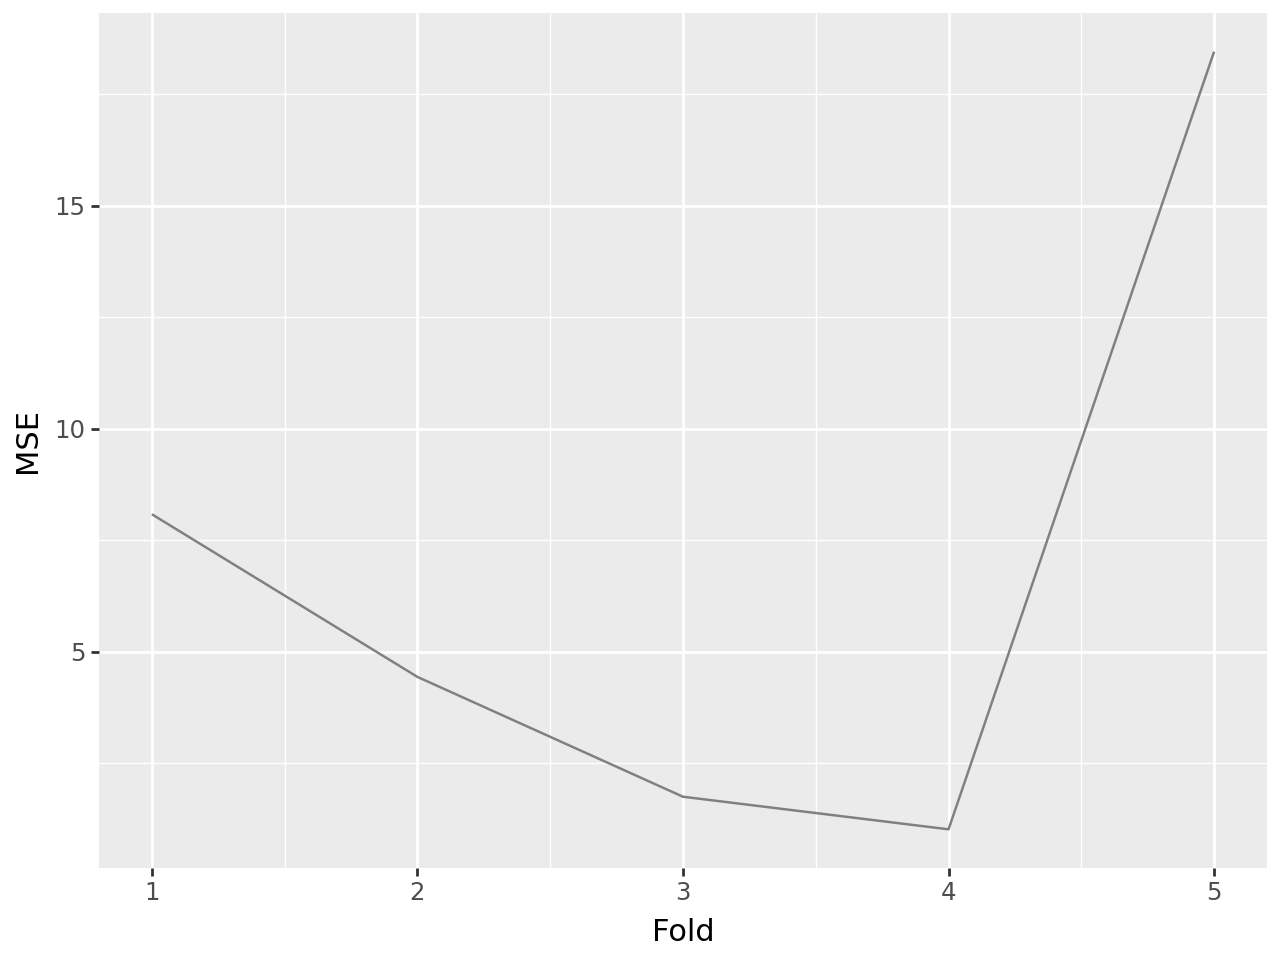

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
from plotnine import ggplot, aes, geom_line


data_for_modeling = penguins_dummified.copy()
X = data_for_modeling.drop("bill_depth_mm", axis=1)
y = data_for_modeling["bill_depth_mm"]

poly_model = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression()
)

cv_mse = -cross_val_score(poly_model, X, y, cv=5, scoring="neg_mean_squared_error")

train = fit.poly_model("")

df_cv = pd.DataFrame({
    "Fold": range(1, 6),
    "MSE": cv_mse
})

p = (
    ggplot(df_cv, aes(x="Fold", y="MSE"))
    + geom_line(color="gray")
)

p

Knn

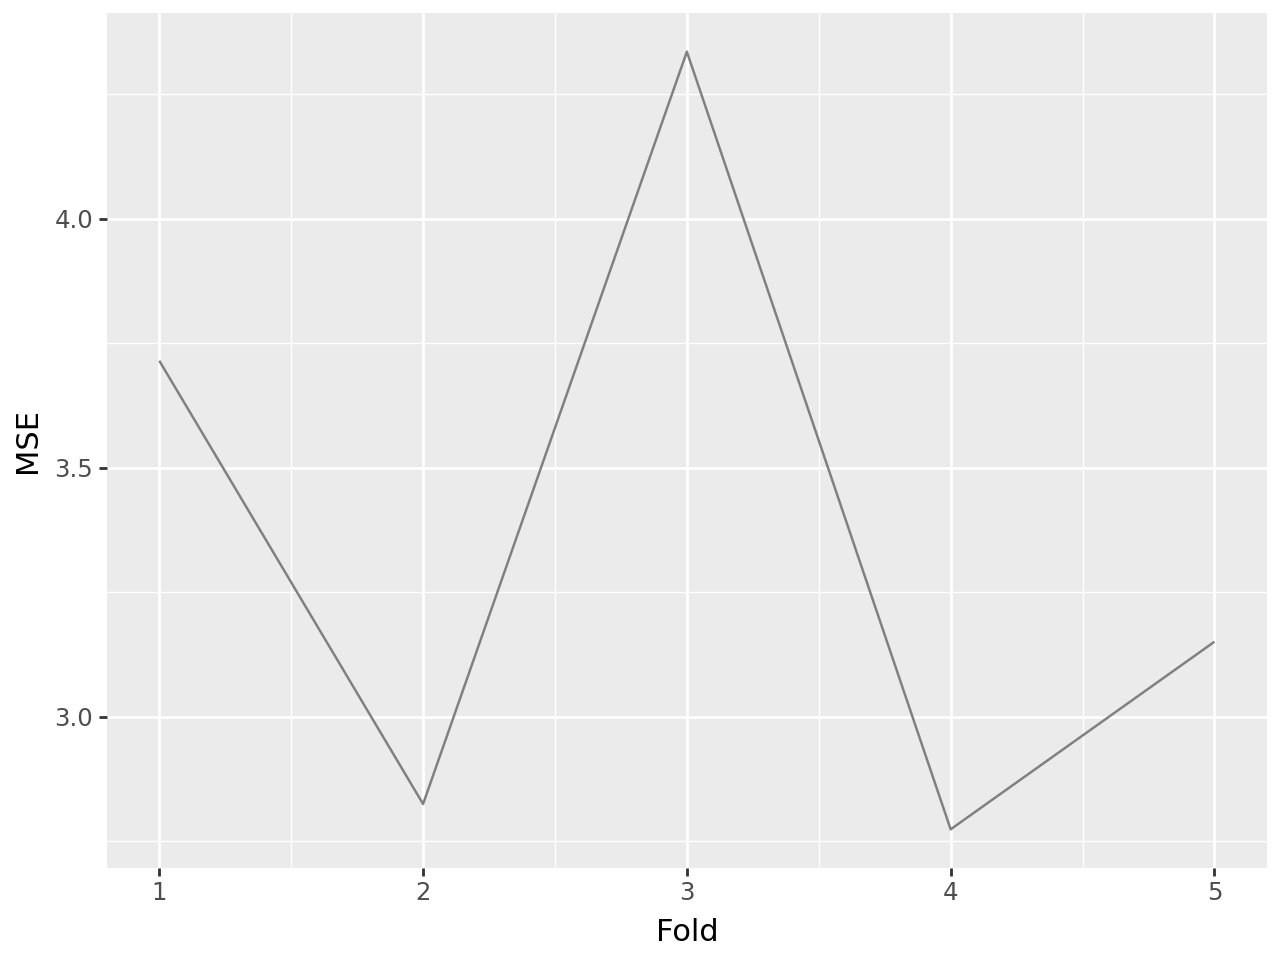

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, labs

knn3 = KNeighborsRegressor(n_neighbors=3)

cv_mse_3 = -cross_val_score(knn3, X, y, cv=5, scoring="neg_mean_squared_error")

df_cv3 = pd.DataFrame({
    "Fold": range(1, 6),
    "MSE": cv_mse_3
})

pknn3 = (
    ggplot(df_cv3, aes(x="Fold", y="MSE"))
    + geom_line(color="gray"))

pknn3


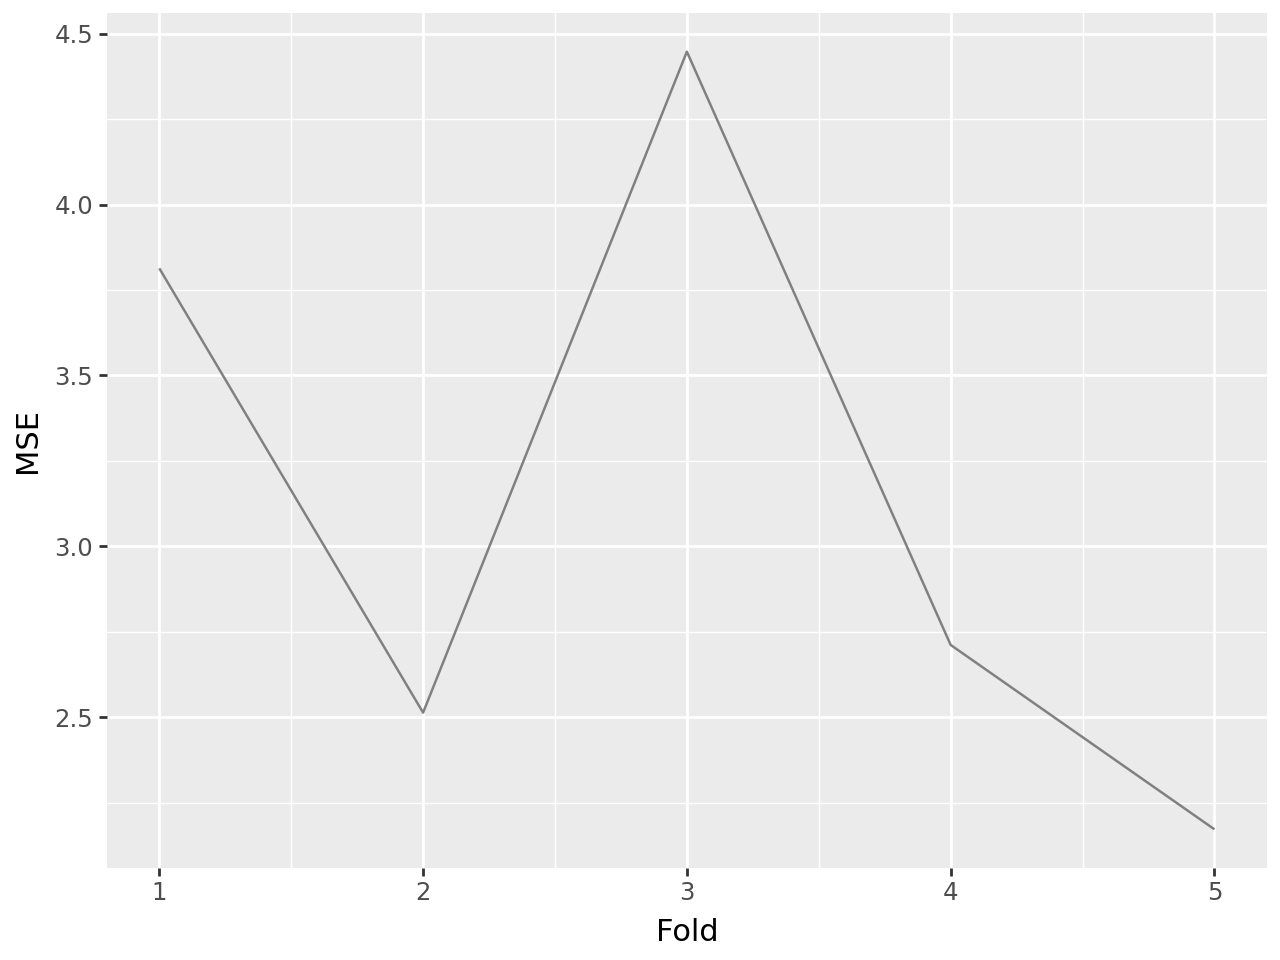

In [ ]:
knn10 = KNeighborsRegressor(n_neighbors=10)

cv_mse_10 = -cross_val_score(knn10, X, y, cv=5, scoring="neg_mean_squared_error")

df_cv10 = pd.DataFrame({
    "Fold": range(1, 6),
    "MSE": cv_mse_10
})

pknn10 = (
    ggplot(df_cv10, aes(x="Fold", y="MSE"))
    + geom_line(color="gray")
    )

pknn10


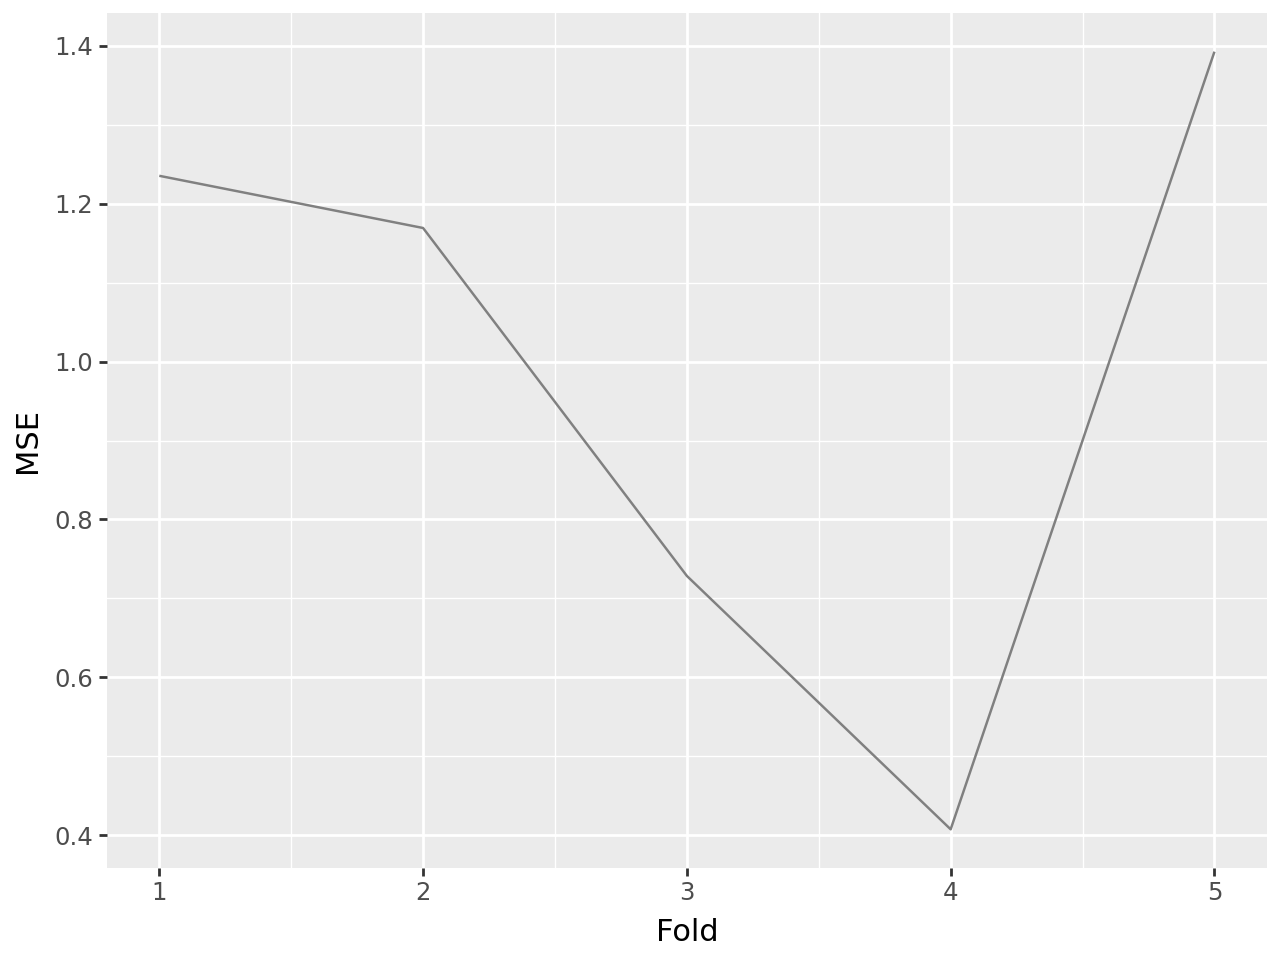

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, labs

tree_model = DecisionTreeRegressor(max_depth=4, random_state=0)

cv_mse_tree = -cross_val_score(tree_model, X, y, cv=5, scoring="neg_mean_squared_error")

df_cv_tree = pd.DataFrame({
    "Fold": range(1, 6),
    "MSE": cv_mse_tree
})

p_tree = (
    ggplot(df_cv_tree, aes(x="Fold", y="MSE"))
    + geom_line(color="gray"))

p_tree


In [ ]:
df_mse = pd.DataFrame({
    "Model": ["Liner Regression", "Knn3", "Knn10", "Tree"],
    "Mean_CV_MSE": [
        np.mean(cv_mse),
        np.mean(cv_mse_3),
        np.mean(cv_mse_10),
        np.mean(cv_mse_tree)
    ]
})
df_mse

,Model,Mean_CV_MSE
0,Liner Regression,6.751777
1,Knn3,3.359849
2,Knn10,3.131625
3,Tree,0.986644


The Knn10 model was the best with the lowest mean MSE. Used mean because corss vall gives diffrent MSE's for each fold.